In [2]:
import pandas as pd

In [3]:
base = pd.read_csv('shipping_ecommerce.csv')

In [4]:
base = base.rename(columns={'Customer_care_calls':'Chamadas de atendimento ao cliente','Customer_rating':'Avaliação do cliente','Prior_purchases':'Compras anteriores','Discount_offered':'Desconto oferecido','Weight_in_gms':'Peso em gramas','Warehouse_block':'Local armazenado','Mode_of_Shipment':'Modo de envio','Product_importance':'Importância do produto','Gender':'Gênero','Class':'Classe'})

In [5]:
lista= range(len(base))
base['Código'] =  1  
lista

range(0, 10998)

In [6]:
base.loc[base['Importância do produto']=='medium','Importância do produto'] = 2
base.loc[base['Importância do produto']=='low','Importância do produto'] = 1
base.loc[base['Importância do produto']=='high','Importância do produto'] = 3

In [7]:
base

,Chamadas de atendimento ao cliente,Avaliação do cliente,Compras anteriores,Desconto oferecido,Peso em gramas,Local armazenado,Modo de envio,Importância do produto,Gênero,Classe,Código
0,5,4,2,10,5395,A,Ship,2,M,1,1
1,4,3,2,6,5867,F,Ship,2,F,0,1
2,3,4,2,2,5957,D,Ship,2,M,0,1
3,3,1,2,27,2551,D,Ship,2,M,1,1
4,7,5,4,9,1329,B,Ship,2,M,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10993,3,5,3,1,5024,F,Road,2,M,1,1
10994,4,1,5,48,2399,D,Flight,1,M,1,1
10995,3,2,10,25,1548,F,Ship,2,M,1,1
10996,3,1,3,11,2194,F,Flight,2,M,1,1


In [8]:
base['Avaliação do cliente'].mean()

2.990452809601746

In [9]:
pesoXimport = base.groupby('Código')[['Importância do produto','Peso em gramas']].mean()

In [10]:
importancia = base['Importância do produto']

In [11]:
pesoXimport['Importância do produto'] = importancia

In [12]:
pesoXimport.sort_values('Importância do produto')

,Peso em gramas,Importância do produto
Código,,
1,3633.873522,2


In [13]:
pesoXimport[pesoXimport['Importância do produto']== 3].sort_values('Peso em gramas', ascending = False)

,Peso em gramas,Importância do produto
Código,,


In [14]:
descXav = base.groupby('Código')[['Desconto oferecido','Avaliação do cliente']].mean()

In [15]:
descXav.loc[descXav['Desconto oferecido'] ==32,'Avaliação do cliente'].mean()

nan

In [16]:
descXav['Desconto oferecido'].mean()

13.373704309874523

In [17]:
descXav = base.groupby('Avaliação do cliente').mean()


In [18]:
descXav = descXav.sort_values('Compras anteriores')


In [19]:
descXav

,Chamadas de atendimento ao cliente,Compras anteriores,Desconto oferecido,Peso em gramas,Classe,Código
Avaliação do cliente,,,,,,
1,4.036242,3.529306,13.458166,3654.797315,0.587472,1.0
2,4.048961,3.559353,13.687760,3585.758891,0.587991,1.0
3,4.058062,3.576597,12.979902,3640.098258,0.606074,1.0
5,4.090742,3.585905,13.494703,3586.005067,0.606633,1.0
4,4.039305,3.587294,13.259598,3701.235832,0.595521,1.0


In [20]:
aux = base.groupby('Gênero')['Código'].sum()

In [21]:
aux

Gênero
F    5544
M    5454
Name: Código, dtype: int64

In [22]:
aux = aux.apply(lambda x:(x /aux.sum())*100)
aux=aux.map('{:.2f}%'.format) 

In [23]:
aux

Gênero
F    50.41%
M    49.59%
Name: Código, dtype: object

In [24]:
base

,Chamadas de atendimento ao cliente,Avaliação do cliente,Compras anteriores,Desconto oferecido,Peso em gramas,Local armazenado,Modo de envio,Importância do produto,Gênero,Classe,Código
0,5,4,2,10,5395,A,Ship,2,M,1,1
1,4,3,2,6,5867,F,Ship,2,F,0,1
2,3,4,2,2,5957,D,Ship,2,M,0,1
3,3,1,2,27,2551,D,Ship,2,M,1,1
4,7,5,4,9,1329,B,Ship,2,M,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10993,3,5,3,1,5024,F,Road,2,M,1,1
10994,4,1,5,48,2399,D,Flight,1,M,1,1
10995,3,2,10,25,1548,F,Ship,2,M,1,1
10996,3,1,3,11,2194,F,Flight,2,M,1,1


In [25]:
int(base['Peso em gramas'].mean())

3633

In [26]:
envioXlocal = base[['Modo de envio','Local armazenado','Código']]

In [27]:
envioXlocal.loc[envioXlocal['Local armazenado']=='A','Local armazenado'] = 1
envioXlocal.loc[envioXlocal['Local armazenado']=='B','Local armazenado'] = 2
envioXlocal.loc[envioXlocal['Local armazenado']=='C','Local armazenado'] = 3
envioXlocal.loc[envioXlocal['Local armazenado']=='D','Local armazenado'] = 4
envioXlocal.loc[envioXlocal['Local armazenado']=='F','Local armazenado'] = 6

In [28]:
# envioXlocal = envioXlocal.groupby('Modo de envio')[['Local armazenado','Código']].value_counts()

In [29]:
envioXlocal

,Modo de envio,Local armazenado,Código
0,Ship,1,1
1,Ship,6,1
2,Ship,4,1
3,Ship,4,1
4,Ship,2,1
...,...,...,...
10993,Road,6,1
10994,Flight,4,1
10995,Ship,6,1
10996,Flight,6,1


In [30]:
base['Local armazenado'].value_counts()

F    3666
D    1834
B    1833
C    1833
A    1832
Name: Local armazenado, dtype: int64

In [31]:
base['Modo de envio'].value_counts()

Ship      7461
Flight    1777
Road      1760
Name: Modo de envio, dtype: int64

In [32]:
aux1 = envioXlocal[envioXlocal['Modo de envio']=='Ship']

In [33]:
aux1=aux1.drop('Código',axis=1)

In [34]:
 aux1 = aux1.value_counts()

<AxesSubplot:ylabel='None'>

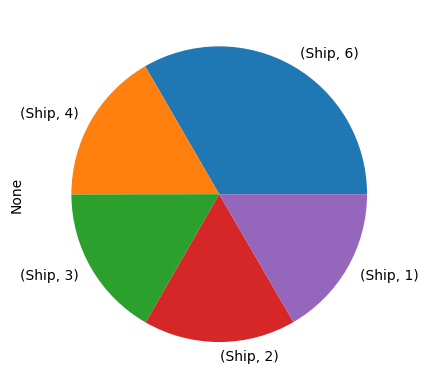

In [35]:
aux1.plot(kind='pie')

In [36]:
aux1 = aux1.apply(lambda x:(x / aux1.sum())*100)
aux1 =aux1.map('{:.1f}%'.format)

In [37]:
aux1

Modo de envio  Local armazenado
Ship           6                   33.3%
               4                   16.7%
               3                   16.7%
               2                   16.7%
               1                   16.6%
dtype: object

In [38]:
envioXimp = base[['Modo de envio','Importância do produto']]

In [39]:
# envioXimp = envioXimp.groupby('Importância do produto').value_counts()

In [40]:
envioXimp

,Modo de envio,Importância do produto
0,Ship,2
1,Ship,2
2,Ship,2
3,Ship,2
4,Ship,2
...,...,...
10993,Road,2
10994,Flight,1
10995,Ship,2
10996,Flight,2


In [41]:
aux2=envioXimp[envioXimp['Importância do produto']==1]

In [48]:
aux2 = aux2.groupby('Modo de envio').value_counts()
aux2

Modo de envio       
Flight         15.8%    1
Road           16.2%    1
Ship           68.0%    1
dtype: int64

In [43]:
aux2 = aux2.apply(lambda x:(x / aux2.sum())*100)
aux2 = aux2.map('{:.1f}%'.format)

In [44]:
aux2

Modo de envio  Importância do produto
Flight         1                         15.8%
Road           1                         16.2%
Ship           1                         68.0%
dtype: object

In [45]:
aux3=envioXimp[envioXimp['Importância do produto']==2]
aux3 = aux3.groupby('Modo de envio').value_counts()
aux3 = aux3.apply(lambda x:(x / aux3.sum())*100)
aux3 = aux3.map('{:.1f}%'.format)
aux3

Modo de envio  Importância do produto
Flight         2                         16.3%
Road           2                         15.7%
Ship           2                         68.0%
dtype: object

In [46]:
aux4=envioXimp[envioXimp['Importância do produto']==3]
aux4 = aux4.groupby('Modo de envio').value_counts()
aux4 = aux4.apply(lambda x:(x / aux4.sum())*100)
aux4 = aux4.map('{:.1f}%'.format)
aux4

Modo de envio  Importância do produto
Flight         3                         17.2%
Road           3                         16.7%
Ship           3                         66.1%
dtype: object

In [47]:
base.describe()

,Chamadas de atendimento ao cliente,Avaliação do cliente,Compras anteriores,Desconto oferecido,Peso em gramas,Classe,Código
count,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,10998.0
mean,4.054555,2.990453,3.567558,13.373704,3633.873522,0.596745,1.0
std,1.141497,1.413635,1.522924,16.206183,1635.382636,0.490573,0.0
min,2.000000,1.000000,2.000000,1.000000,1001.000000,0.000000,1.0
25%,3.000000,2.000000,3.000000,4.000000,1839.250000,0.000000,1.0
50%,4.000000,3.000000,3.000000,7.000000,4149.000000,1.000000,1.0
75%,5.000000,4.000000,4.000000,10.000000,5049.750000,1.000000,1.0
max,7.000000,5.000000,10.000000,65.000000,7846.000000,1.000000,1.0
